In [31]:
from julia.api import Julia
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

os.environ["JULIA_NUM_THREADS"] = "4"
jl = Julia(compiled_modules=False)

In [32]:
# import covergence statistic functions
jl.eval('include("convergence_statistics.jl")')

<PyCall.jlwrap gap_e_var>

### **1. Error when varying A dimention** ###

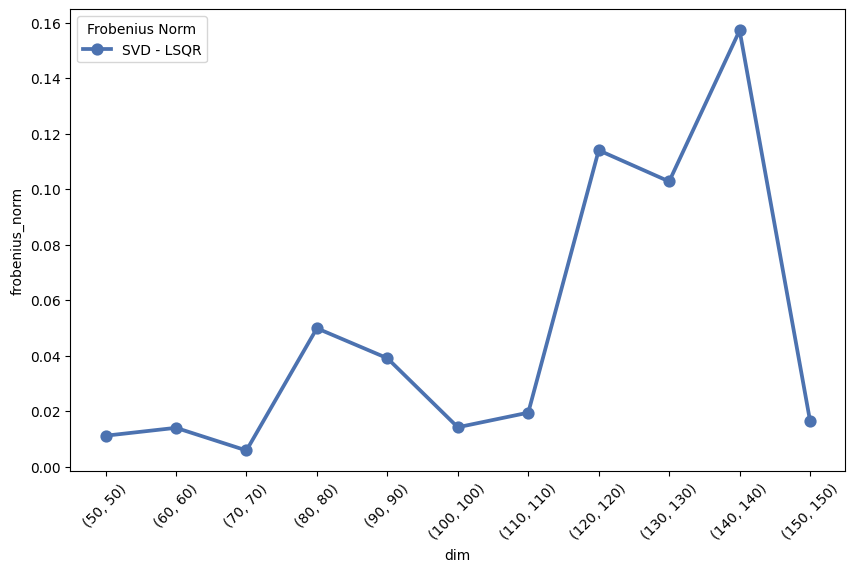

In [33]:
LSQR_SVD = jl.eval('gap_A_var()')

# Convert to DataFrames
df = pd.DataFrame(LSQR_SVD)

# Add a 'method' column to distinguish the data sources
df['Frobenius Norm'] = 'SVD - LSQR'

# Concatenate the dataframes
df = pd.concat([df])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim',y='frobenius_norm', hue='Frobenius Norm', palette='deep')
plt.xticks(rotation=45)
plt.show()



### **2. Error when varyng rank k value** ###

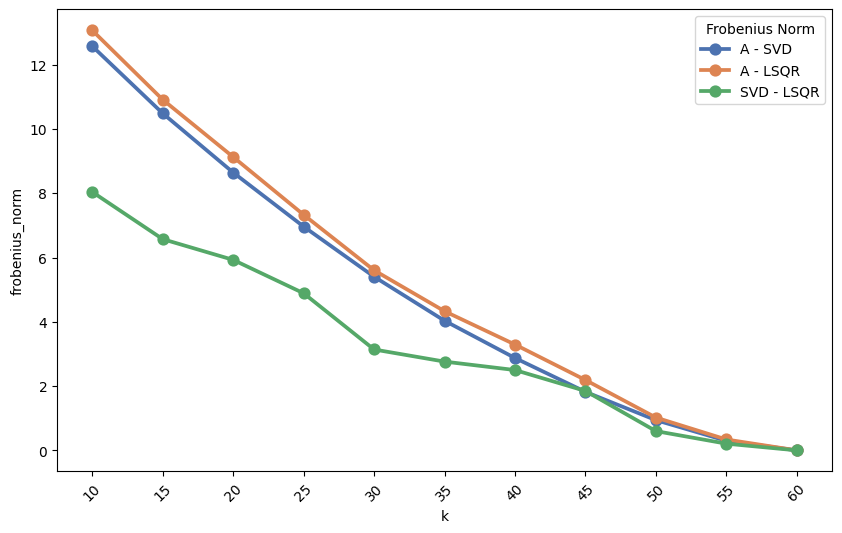

In [34]:
Svd_A, LSQR_A, LSQR_SVD = jl.eval('gap_k_var()')

# Convert Svd_A, LSQR_A, LSQR_SVD to DataFrames
df1 = pd.DataFrame(Svd_A)
df2 = pd.DataFrame(LSQR_A)
df3 = pd.DataFrame(LSQR_SVD)

# Add a 'method' column to distinguish the data sources
df1['Frobenius Norm'] = 'A - SVD'
df2['Frobenius Norm'] = 'A - LSQR'
df3['Frobenius Norm'] = 'SVD - LSQR'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
#df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='k', y='frobenius_norm', hue='Frobenius Norm', palette='deep')
plt.xticks(rotation=45)
plt.show()

### **3. Error when varying e** ###

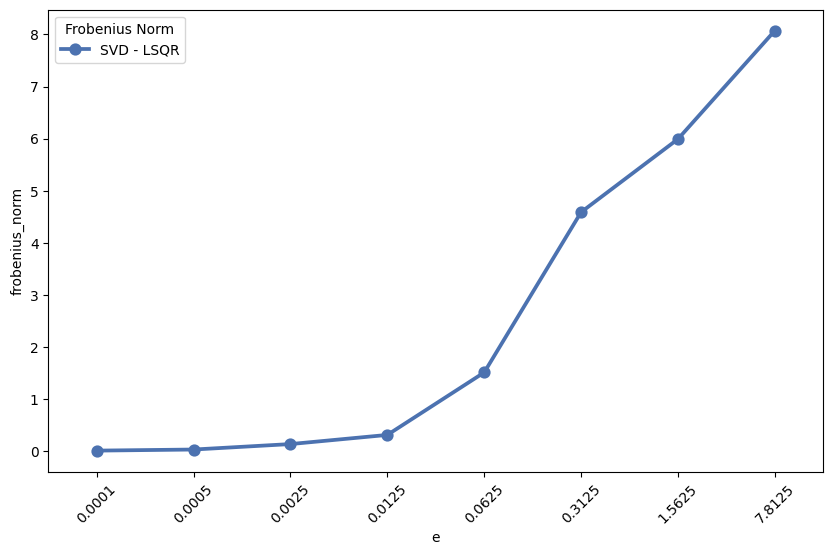

In [35]:
LSQR_SVD = jl.eval('gap_e_var()')

# Convert LSQR_SVD to DataFrames
df = pd.DataFrame(LSQR_SVD)

# Add a 'method' column to distinguish the data sources
df['Frobenius Norm'] = 'SVD - LSQR'

# Concatenate the dataframes
df = pd.concat([df])

# Convert 'dim' to string so it can be used as a categorical variable
#df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='e', y='frobenius_norm', hue='Frobenius Norm', palette='deep')
plt.xticks(rotation=45)
plt.show()